# Avaliação de Redes Complexas

Nome: Jefter Santiago Mares

<hr>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random as random
import seaborn as sns
from scipy.stats import pearsonr
import pandas as pd

# **1 -** (a) Crie o gráfo a seguir usando a biblioteca networkx e mostre o gráfo.<br>
Link para visualizar o grafo: https://commons.wikimedia.org/wiki/File:6n-graf.png<br>

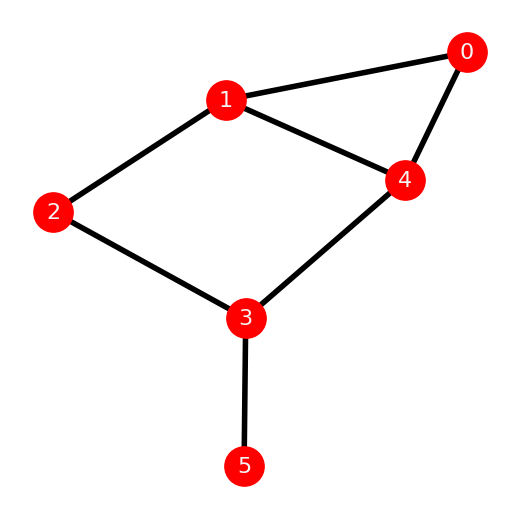

In [ ]:
g = nx.Graph(directed = False)
nodes = [0, 1, 2, 3, 4, 5]
g.add_nodes_from(nodes)
edge_list = [(0, 1), (0, 4), (1, 2), (1, 4), (2, 3), (3, 4), (3, 5)]
g.add_edges_from(edge_list)
g = nx.convert_node_labels_to_integers(g, first_label=0)

plt.figure(figsize=(5, 5))
nx.draw(g, with_labels = True, width= 4, node_color = 'r', node_size = 800, font_color="whitesmoke", font_size = 16)
plt.show(True)

(b) Simule uma caminha aleatória nesse grafo e monte uma matriz onde o elemento Mij representa o número de visitas ao vértice j dado que a caminhada iniciou em i. Considere pelo menos 100 passos. Compare o número de visitas com a medida eigenvector centrality de cada vértice.

In [ ]:
T = 100

In [ ]:
X_mean = np.zeros(6)
Y_mean = np.zeros(6)

for i in range(0, T):
  seed_node = 0
  ng = g.neighbors(seed_node)
  walk = []
  for t in range(0,T):
      next_node = random.choice(list(ng))
      ng = g.neighbors(next_node)
      walk.append(next_node)
#  print('Walk:', walk)

  M = np.unique(walk, return_counts=True)
  # normalizacao
  X = np.array(M[1]) / np.array(sum(M[1]))

  # medida de eigenvector_centrality e normalizacao
  EC = dict(nx.eigenvector_centrality(g, max_iter = T))
  EC = list(EC.values())
  Y = np.array(EC) / sum(EC)

  X_mean += X
  Y_mean += Y

X_mean = X_mean / T
Y_mean = Y_mean / T

Quantidade média de visitas e `Eigenvector Centrality` para cada um dos vértices:

In [ ]:
print("Vertices: ", M[0])
print("Qtd de visitas: ", X_mean)
print("EC: ", Y_mean)

Vertices:  [0 1 2 3 4 5]
Qtd de visitas:  [0.1455 0.2162 0.14   0.2092 0.2178 0.0713]
EC:  [0.17096501 0.21411449 0.15272668 0.17373199 0.22004914 0.0684127 ]


O número de visitas para cada vértice e seu respectivo EC tem valor parecido ja que é comum que alguns vértices da rede sejam visitados mais vezes. O EC é uma medida de centralidade e podemos ter uma noção de que os scores retornados são maiores para os vertices mais conectados.

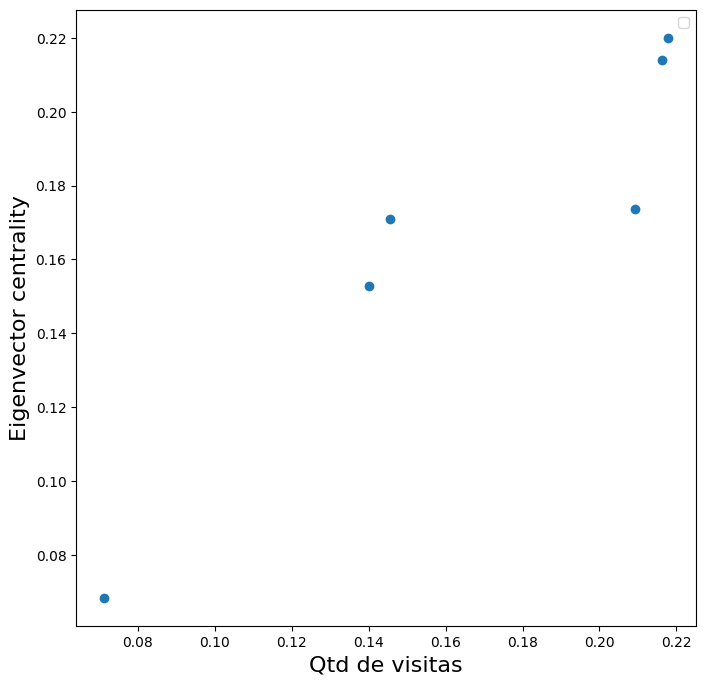

In [ ]:
plt.figure(figsize=(8, 8))
plt.plot(X_mean, Y_mean, 'o')
plt.legend()
plt.xlabel("Qtd de visitas", fontsize=16)
plt.ylabel("Eigenvector centrality", fontsize=16)
plt.show()

<hr>

# **2**

## (a) Leia a rede do arquivo advogato.txt e mostre a distribuição acumulada complementar do grau, isto é, $P(K > k)$.

- Usei a rede `lesmis.gml`.

In [ ]:
g = nx.read_gml("/content/drive/MyDrive/Colab Notebooks/Prova - Redes Complexas/data_prova/lesmis.gml")
# Seleciona o maior componente da rede.
gcc = sorted(nx.connected_components(g), key=len, reverse=True)
g = g.subgraph(gcc[0])

$$ P(K > k) = 1 - P(K = k)$$

Podemos mostrar a distribuição simplesmente fazendo o cálculo dos graus de cada vértice da rede e representar num plot da distribuição de grau por distribuição do grau complementar da rede.

In [ ]:
vk = list(dict(g.degree()).values())
Pk = np.zeros(np.max(vk)+1)

# distribuicao do grau
for k in vk:
  Pk[k] = Pk[k] + 1
Pk = Pk/sum(Pk)
# distribuicao acumulada
Pk  = np.cumsum(Pk)
# complementar
cPk = 1 - Pk

In [ ]:
vk_list = np.arange(0, np.max(vk) + 1)

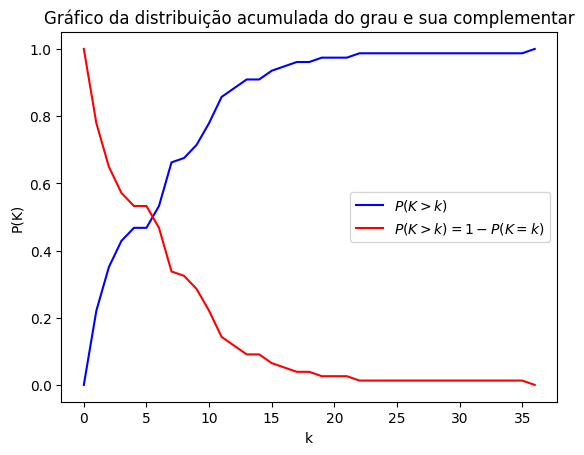

In [ ]:
plt.plot(vk_list, Pk, label="$P(K > k)$", color="blue")
plt.plot(vk_list, cPk,label="$P(K > k) = 1 - P(K = k)$", color="red")

plt.title("Gráfico da distribuição acumulada do grau e sua complementar")
plt.xlabel('k')
plt.ylabel('P(K)')
plt.legend()
plt.show()

## (b) Mostre o gráfico de Knn(k), ou seja, o grau médio dos vizinhos dos vértices de grau k em função do grau k.

In [ ]:
knn = []
for i in g.nodes():
    aux =  nx.average_neighbor_degree(g, nodes = [i])
    knn.append(float(aux[i]))
knn = np.array(knn)

In [ ]:
vk = np.array(list(dict(g.degree()).values()))
knnk = list()
ks = list()

In [ ]:
for k in np.arange(np.min(vk), np.max(vk)+1):
    aux = vk == k
    if(len(knn[aux]) > 0):
        av_knn = np.mean(knn[aux])
        knnk.append(av_knn)
        ks.append(k)

Text(0, 0.5, 'Knn(k)')

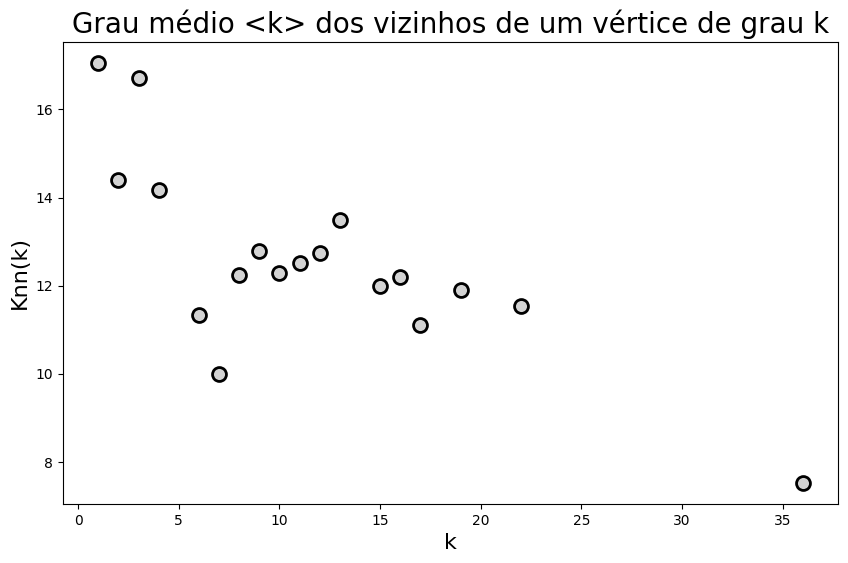

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(ks, knnk, '-o', color='gray',markersize=10, linewidth=0,
         markerfacecolor='lightgray', markeredgecolor='black', markeredgewidth=2)
plt.title("Grau médio <k> dos vizinhos de um vértice de grau k", fontsize=20)
plt.xlabel("k", fontsize=16)
plt.ylabel("Knn(k)", fontsize=16)

## (c) Calcule a matriz de menores distâncias $D$ a matriz $A^n$, que presenta o número de caminhadas de comprimento $n$ entre cada par de vértices. Faça um gráfico da correlação entre $D_{ij}$ e $A_{ij}$ para diferentes valores de $n$. Ou seja, um gráfico em que o eixo x representa n e o y, a correlação entre essas duas matrizes.

In [ ]:
# Menores distancias
D = np.array(nx.floyd_warshall_numpy(g))

In [ ]:
print(D)

[[0. 1. 1. ... 3. 3. 3.]
 [1. 0. 2. ... 4. 4. 4.]
 [1. 2. 0. ... 3. 3. 3.]
 ...
 [3. 4. 3. ... 0. 2. 2.]
 [3. 4. 3. ... 2. 0. 2.]
 [3. 4. 3. ... 2. 2. 0.]]


In [ ]:
A = nx.adjacency_matrix(g).todense()
An = A
Am = []

Am.append(A)

N = 15
for i in range(1, N):
    print(An)
    An = An@A
    Am.append(An)

In [ ]:
corr_mat = []
for A in Am:
    corr = np.corrcoef(D.flatten(), A.flatten())[0, 1]
    corr_mat.append(corr)

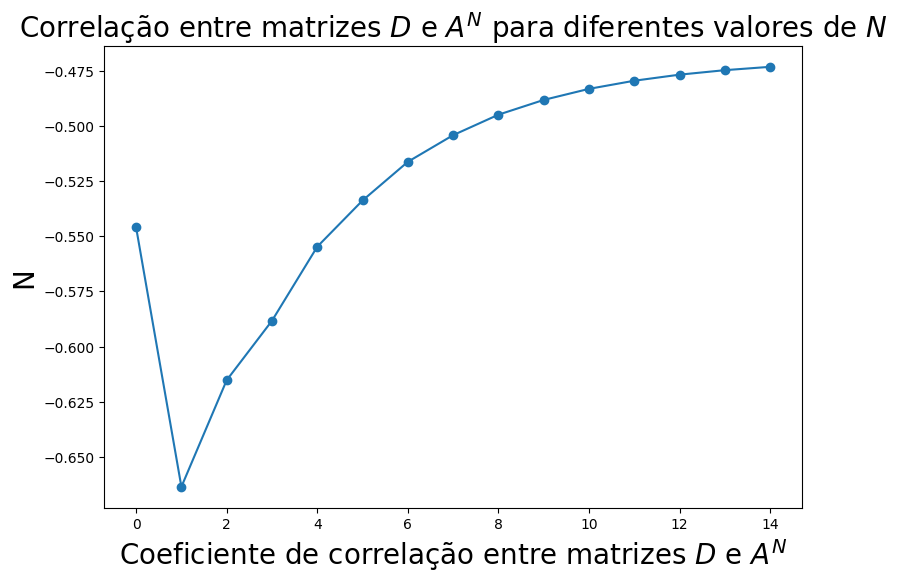

In [ ]:
plt.figure(figsize=(9, 6))
plt.plot(np.arange(0, N), corr_mat, '-o')
plt.title("Correlação entre matrizes $D$ e $A^N$ para diferentes valores de $N$", fontsize=20)
plt.xlabel("Coeficiente de correlação entre matrizes $D$ e $A^N$", fontsize=20)
plt.ylabel("N", fontsize=20)
plt.show()

<hr>

# **3 -** Considere a rede do arquivo internet_routers-22july06.gml. Escreva um código que calcule as seguintes medidas: (a) grau médio, (b) transitividade, (c) segundo momento da distribuição do grau, (d) entropia de Shannon da distribuição do grau, (e) coeficiente de assortatividade. Considere apenas o maior componente. Armazene os valoes em uma lista e imprima essa lista, indicando os valores de cada medida.

In [ ]:
g = nx.read_gml("/content/drive/MyDrive/Colab Notebooks/Prova - Redes Complexas/data_prova/internet_routers-22july06.gml")
gcc = sorted(nx.connected_components(g), key=len, reverse=True)
g = g.subgraph(gcc[0])

In [ ]:
def degree_distribution(G):
  vk = np.array(list(dict(G.degree()).values()))
  max_vk = np.max(vk)
  min_vk = np.min(min)

  # Creating a distribution
  kvalues = np.arange(0, max_vk+1)
  Pk = np.zeros(max_vk+1)
  for i in vk:
    Pk[i] += 1
  Pk = Pk/sum(Pk)
  return kvalues, Pk

def moment_of_degree_distribution(vk, m):
  n = 0
  for k in vk:
    n += k**m
  return n/len(vk)

# Shannon Entropy of the degree distribution.
def H(G):
  vk, pk = degree_distribution(G)
  H = 0
  for p in pk:
    if(p>0):
      H -= + p*np.log2(p)
  return H

In [ ]:
vk = list(dict(g.degree()).values())
vals = []
vals.append(moment_of_degree_distribution(vk, 1))
vals.append(moment_of_degree_distribution(vk, 2))
vals.append(nx.transitivity(g))
vals.append(H(g))
vals.append(nx.degree_assortativity_coefficient(g))

In [ ]:
print("1º Momento de distribuição do grau = %3.4f"%vals[0])
print("2º Momento de distribuição do grau = %3.4f"%vals[1])
print("Transitividade  = %3.4f"%vals[2])
print("Entropia de Shannon do grau = %3.4f"%vals[3])
print("Coeficiente de assortatividade = %3.4f"%vals[4])

1º Momento de distribuição do grau = 4.2186
2º Momento de distribuição do grau = 1103.0002
Transitividade  = 0.0111
Entropia de Shannon do grau = 2.3658
Coeficiente de assortatividade = -0.1984


<hr>

# **4 -** Simule o modelo de propagação de epidemias SIR na rede de aeroportos dos EUA (USairport_2010.txt). Calcule a correlação de Pearson entre a fração final de recuperados e as seguintes medidas de centralidade: (a) grau, (b) betweenness centrality, (c) eigenvector centrality, (d) closenness centrality. Mostre os resultados e indique a maior correlação. Considere $\beta = 0.05$ e $\mu = 0.1$ no modelo SIR.

In [ ]:
g = nx.read_edgelist("/content/drive/MyDrive/Colab Notebooks/Prova - Redes Complexas/data_prova/USairport_2010.txt", nodetype=int)
# Seleciona o maior componente da rede.
gcc = sorted(nx.connected_components(g), key=len, reverse=True)
g = g.subgraph(gcc[0])
g = nx.convert_node_labels_to_integers(g, first_label=0)

In [ ]:
def find(v, i):
    l = []
    pos = 0
    for x in v:
        if(x == i):
            l.append(pos)
        pos = pos + 1
    return l


def SIR_single_seed(G, seed, beta, mu):
    N = len(G)
    seed_node = seed
    vector_states = np.zeros(N)
    vector_states[seed_node] = 1
    ninfected = 1
    t = 0
    infected = list()
    vt = list() # this list stores the time step
    vI = list() # this list stores the fraction of infected nodes
    vR = list() # this list stores the fraction of recovered nodes
    vS = list() # this list stores the fraction of susceptible nodes

    while ninfected > 0:
        infected = find(vector_states,1)
        for i in infected:
            neigs = G.neighbors(i)
            for j in neigs:
                if np.random.rand() < beta:
                    if(vector_states[j] != 2):
                        vector_states[j] = 1
        for k in infected:
            if np.random.rand() < mu:
                vector_states[k] = 2
        ninfected = len(find(vector_states,1))
        vI.append(ninfected/N)
        vR.append(len(find(vector_states,2))/N)
        vS.append(len(find(vector_states,0))/N)
        t = t + 1
        vt.append(t)
    return vI, vS, vR, vt

In [ ]:
seed = 0
beta = 0.05
mu = 0.1

In [ ]:
num = len(g)
array = []
for _ in range(num):
  vI, vS, vR, vt = SIR_single_seed(g, seed, beta, mu)
  array.append(len(vR)/num)
len(array)

1572

In [ ]:
vk = np.array(list(dict(g.degree()).values()))
betweennesss = np.array(list(nx.betweenness_centrality(g).values()))
eigenvector = np.array(list(nx.eigenvector_centrality(g).values()))
closeness = np.array(list(nx.closeness_centrality(g).values()))

In [ ]:
print("Correlação grau: ", pearsonr(vk, array)[0])
print("Correlação betweenness centrality: ", pearsonr(betweennesss, array)[0])
print("Correlação eigenvector centrality: ", pearsonr(eigenvector, array)[0])
print("Correlação closeness centrality: ", pearsonr(closeness, array)[0])

Correlação grau:  -0.040020540645786605
Correlação betweenness centrality:  0.02312706164415769
Correlação eigenvector centrality:  -0.0475569458428463
Correlação closeness centrality:  -0.026059621839473426


<hr>

# **5 -** Gere redes do tipo BA, ER e WS (p=0.05) com grau médio igual a 10 e N = 500. Desenvolva um estudo para mostrar que essas apresentam topologias diferentes. (Seja criativ@).

## Análise da topologia das redes `BA`, `ER` e `WS`


In [ ]:
N = 500
k = 10

### Gerando as redes


In [ ]:
# ER
p = k/(N-1)
ER = nx.gnp_random_graph(N, p, seed=None, directed=False)

# WS
knew = int(k/2)
p = 0.05
WS = nx.watts_strogatz_graph(N, knew, p, seed=None)

# BA
BA = nx.barabasi_albert_graph(N, knew)

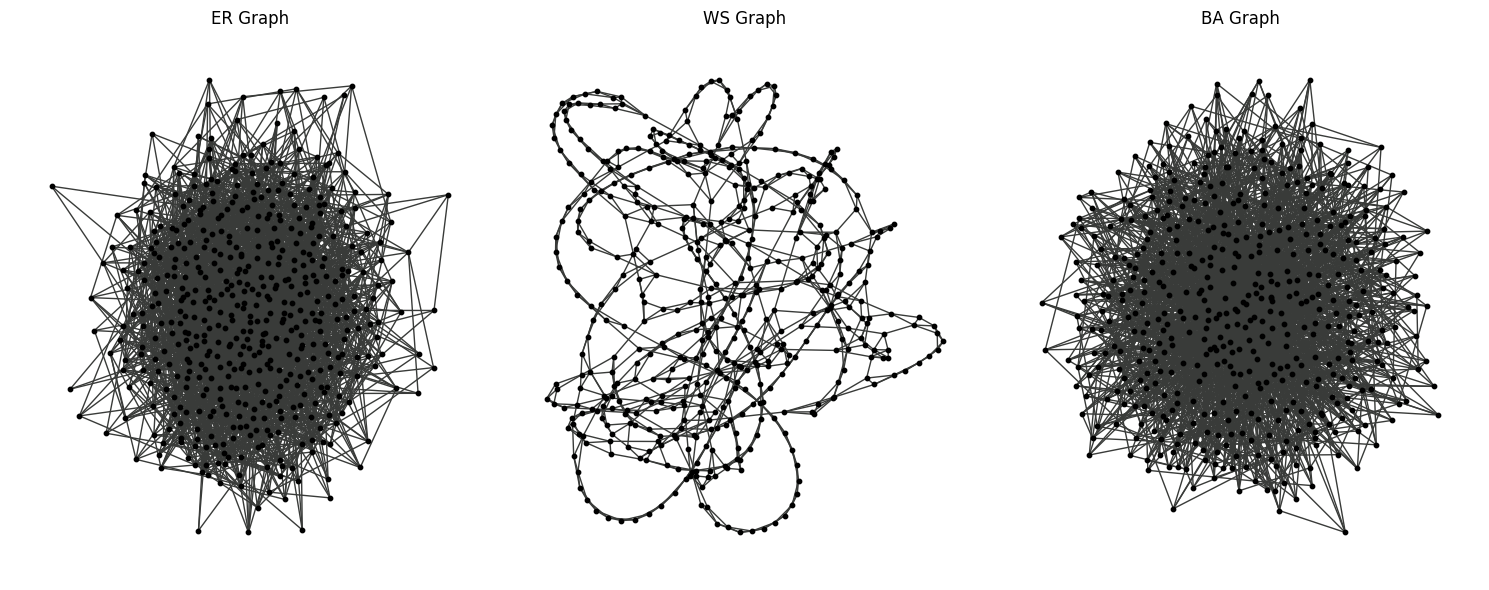

In [ ]:
# Desenhando as redes
fig, axes = plt.subplots(1, 3, figsize=(15, 6))

node_size = 10

# ER
pos = nx.spring_layout(ER)
nx.draw(ER, ax=axes[0],node_size=node_size, edge_color = "#393b39", node_color="black",  pos = pos)
axes[0].set_title('ER Graph')

# WS
pos = nx.spring_layout(WS)
nx.draw(WS, ax=axes[1], node_size=node_size, edge_color = "#393b39", node_color="black", pos = pos)
axes[1].set_title('WS Graph')

# BA
pos = nx.spring_layout(BA)
nx.draw(BA, ax=axes[2], node_size=node_size, edge_color = "#393b39", node_color="black", pos=pos)
axes[2].set_title('BA Graph')

plt.tight_layout()
plt.show()

In [ ]:
ks_er, pk_er = degree_distribution(ER)
ks_ws, pk_ws = degree_distribution(WS)
ks_ba, pk_ba = degree_distribution(BA)

In [ ]:
measures = [
    nx.degree_centrality,
    nx.betweenness_centrality,
    nx.average_shortest_path_length,
    nx.closeness_centrality,
    nx.pagerank,
    nx.harmonic_centrality,
    nx.subgraph_centrality,
    nx.average_clustering,
    nx.transitivity,
    nx.degree_assortativity_coefficient,
    nx.transitivity
]

In [ ]:
networks = [ER, WS, BA]
data = []
for network in networks:
    network_measures = {}
    for measure in measures:
        value = measure(network)
        network_measures[measure.__name__] = value
    data.append(network_measures)

In [ ]:
df = pd.DataFrame(data)

In [ ]:
correlation_matrix = df.corr()

<ipython-input-403-68bbfff3c4eb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


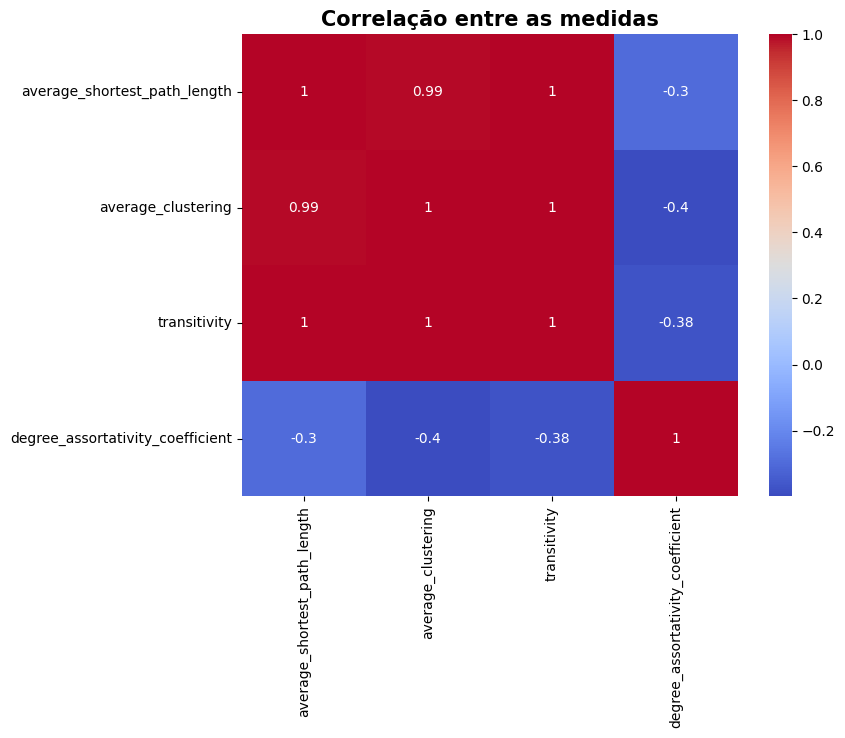

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlação entre as medidas", fontsize = 15, fontweight = 'bold')
plt.show()

A partir da matriz de correlação das medidas feitas para as três redes, conseguimos ter uma intuição sobre quais medidas são mais importantes para determinar as diferenças entre topologia dessas redes.

Vamos então analisar as redes a partir das medidas de comprimento médio do menor caminho, coeficiente médio de aglomeração e transitividade.


In [ ]:
def measure(G):
  print("Comprimento médio do menor caminho = %3.2f" %nx.average_shortest_path_length(G))
  print("Coeficiente médio de aglomeração = %3.2f" %nx.average_clustering(G))
  print("Transitividade = %3.2f" %nx.transitivity(G))

Rede `ER`:

In [ ]:
measure(ER)

Comprimento médio do menor caminho = 2.95
Coeficiente médio de aglomeração = 0.02
Transitividade = 0.02


Rede `WS`:

In [ ]:
measure(WS)

Comprimento médio do menor caminho = 10.72
Coeficiente médio de aglomeração = 0.44
Transitividade = 0.43


Rede `BA`:

In [ ]:
measure(BA)

Comprimento médio do menor caminho = 2.78
Coeficiente médio de aglomeração = 0.06
Transitividade = 0.05


Note que a rede `WS` é a que mais se difere, como ela tem uma medida de comprimento médio do caminho mais curto tão grande eu resolvi também fazer medidas do diametro dessas redes e a rede `WS` também tem o maio diametro entre as três. Isso porque a probabilidade de rewiring $p$ utilizada para a rede `WS` era muito inferior a probalidade de conexão das outras duas redes. Esse fato também implica na medida de transitividade da rede `WS`e seu coeficiente médio de aglomeração.

In [ ]:
print("Diametro rede ER = ", nx.diameter(ER))
print("Diametro rede WS = ", nx.diameter(WS))
print("Diametro rede BA = ", nx.diameter(BA))

Diametro rede ER =  5
Diametro rede WS =  24
Diametro rede BA =  4


Para analisar as redes `ER` e `BA` com esses parametros dados, não é o bastante olhar apenas para esses resultados e sim para o comportamento mais geral da rede. Olhando para os resultados dessas medidas poderiamos supor que essas redes são muito parecidas, já que as diferenças são muito baixas. Por isso também foi feito um estudo a cerca da distribuição do grau nessas redes, também incluindo a de `WS`, para tentar observar algum comportamento que as diferencie a `ER` e `BA`.

<ipython-input-410-c1b38a4dd150>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(ks_er,pk_er,'bo', color="blue", label="Rede ER")
<ipython-input-410-c1b38a4dd150>:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(ks_ws, pk_ws, 'bo', color="green", label="Rede WS")
<ipython-input-410-c1b38a4dd150>:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(ks_ba, pk_ba, 'bo', color="red", label="Rede BA")


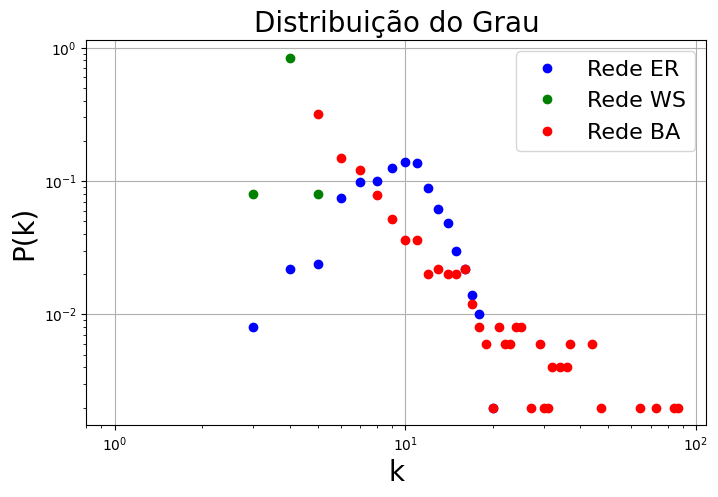

In [ ]:
plt.figure(figsize=(8,5))
fig = plt.subplot(1,1,1)
fig.set_xscale('log')
fig.set_yscale('log')

plt.plot(ks_er, pk_er,'bo', color="blue", label="Rede ER")
plt.plot(ks_ws, pk_ws, 'bo', color="green", label="Rede WS")
plt.plot(ks_ba, pk_ba, 'bo', color="red", label="Rede BA")

plt.xlabel("k", fontsize=20)
plt.ylabel("P(k)", fontsize=20)
plt.title("Distribuição do Grau", fontsize=20)
plt.legend(fontsize=16)
# plt.xlim(10, 1000)
plt.grid()
plt.show()

A única entre essas que segue a lei de potências é a do modelo `BA`, ou seja, é uma rede sem escala. A rede `ER` segue uma distribuição binomial que podemos demonstrar a partir do gráfico abaixo:

In [ ]:
from scipy.stats import binom

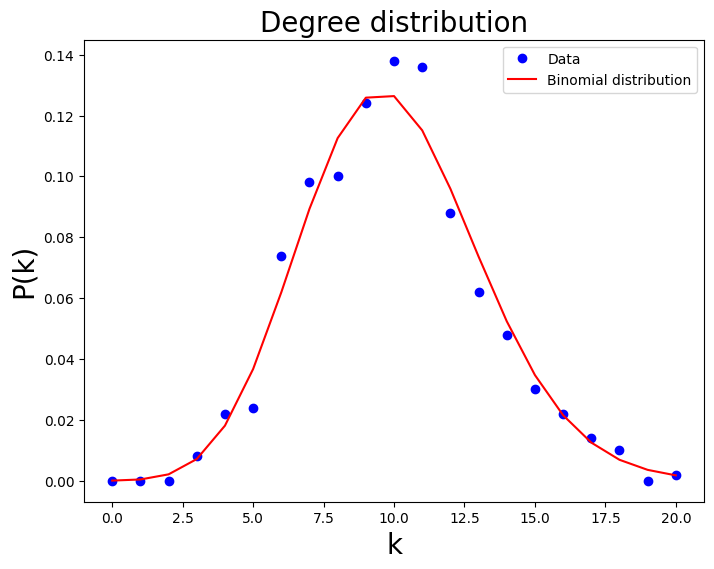

In [ ]:
ks, Pk = degree_distribution(ER)

plt.figure(figsize=(8,6))
plt.plot(ks,Pk,'bo', label='Data')
plt.xlabel("k", fontsize=20)
plt.ylabel("P(k)", fontsize=20)
plt.title("Degree distribution", fontsize=20)

## Fitting of. binomial distribution
N = len(ER)
# print(N)
p = np.mean(ks) / (N - 1)
# print(p)
pk = binom.pmf(ks, N, p)
# print(pk)
plt.plot(ks, pk, 'r', label='Binomial distribution')
plt.legend()
plt.show(True)

Alem disso também podemos identificar a diferença de topologia entre as redes `AB` e `ER` a partir de simulação de ataques e falhas. Nas redes do tipo `AB` há a existência de hubs, que por sua vez podem fazer com que a rede seja mais vulneravel à ataques.

Com isso podemos afirmar que a rede `BA` é uma rede sem escala, assim como a `WS`, porem, com os parametros dados, a `WS` não se comporta como uma rede em que há presença de hubs. Já a rede `ER` é similar à `BA` apenas em valores médios como grau ou clustering, mas possui uma estrutura muito diferente, sem presença de hubs na rede.
